In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
! pip install pandas




In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/data_ecommerce_customer_churn.csv")

In [ ]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [ ]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [ ]:
df.isna().sum()

,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


In [ ]:
df.isna().sum()*100/len(df)

,0
Tenure,4.922608
WarehouseToHome,4.288252
NumberOfDeviceRegistered,0.000000
PreferedOrderCat,0.000000
SatisfactionScore,0.000000
MaritalStatus,0.000000
NumberOfAddress,0.000000
Complain,0.000000
DaySinceLastOrder,5.404720
CashbackAmount,0.000000


In [ ]:

numerical_columns = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']


for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)
missing_percent = df.isna().sum() * 100 / len(df)
print(missing_percent)



Tenure                      0.0
WarehouseToHome             0.0
NumberOfDeviceRegistered    0.0
PreferedOrderCat            0.0
SatisfactionScore           0.0
MaritalStatus               0.0
NumberOfAddress             0.0
Complain                    0.0
DaySinceLastOrder           0.0
CashbackAmount              0.0
Churn                       0.0
dtype: float64


/tmp/ipython-input-16-2669429272.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [ ]:
for col in df.columns:
   print(col)
   print(df[col].unique())
   print("")

Tenure
[15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10.  9.  8. 19.  0.  3.  5. 18.
 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60. 50.]

WarehouseToHome
[ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.   6.  31.  28.  10.  19.  32.  23.  30.  35.
  34.  24.   5.  36. 127.]

NumberOfDeviceRegistered
[4 3 6 2 5 1]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']

SatisfactionScore
[3 1 4 2 5]

MaritalStatus
['Single' 'Married' 'Divorced']

NumberOfAddress
[ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]

Complain
[0 1]

DaySinceLastOrder
[ 7.  3.  8. 11.  2.  1.  4.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18. 16.
 13. 15. 46. 31.]

CashbackAmount
[143.32 129.29 168.54 ... 147.66 231.86 153.73]

Churn
[0 1]



In [ ]:
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Laptop & Accessory,1458
Mobile Phone,887
Fashion,585
Mobile,559
Grocery,273
Others,179


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2055
Single,1310
Divorced,576


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,3267
1,674


In [ ]:
df['CashbackAmount'].value_counts()

,count
CashbackAmount,
188.47,7
154.73,6
149.36,6
149.51,6
126.10,6
...,...
124.76,1
197.15,1
230.02,1


In [ ]:
df['WarehouseToHome'].value_counts()

,count
WarehouseToHome,
14.0,384
9.0,380
8.0,310
7.0,277
16.0,211
15.0,210
6.0,205
10.0,190
13.0,173


In [ ]:
df['Tenure'].value_counts()

,count
Tenure,
1.0,489
9.0,360
0.0,347
8.0,192
10.0,155
4.0,151
7.0,151
5.0,145
11.0,136


In [ ]:
df['Complain'].value_counts()

,count
Complain,
0,2828
1,1113


/tmp/ipython-input-36-283736038.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')
/tmp/ipython-input-36-283736038.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='WarehouseToHome', data=df, palette='Set2')
/tmp/ipython-input-36-283736038.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df, palette='Set2')
/tmp/ipython-input-36-283736038.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

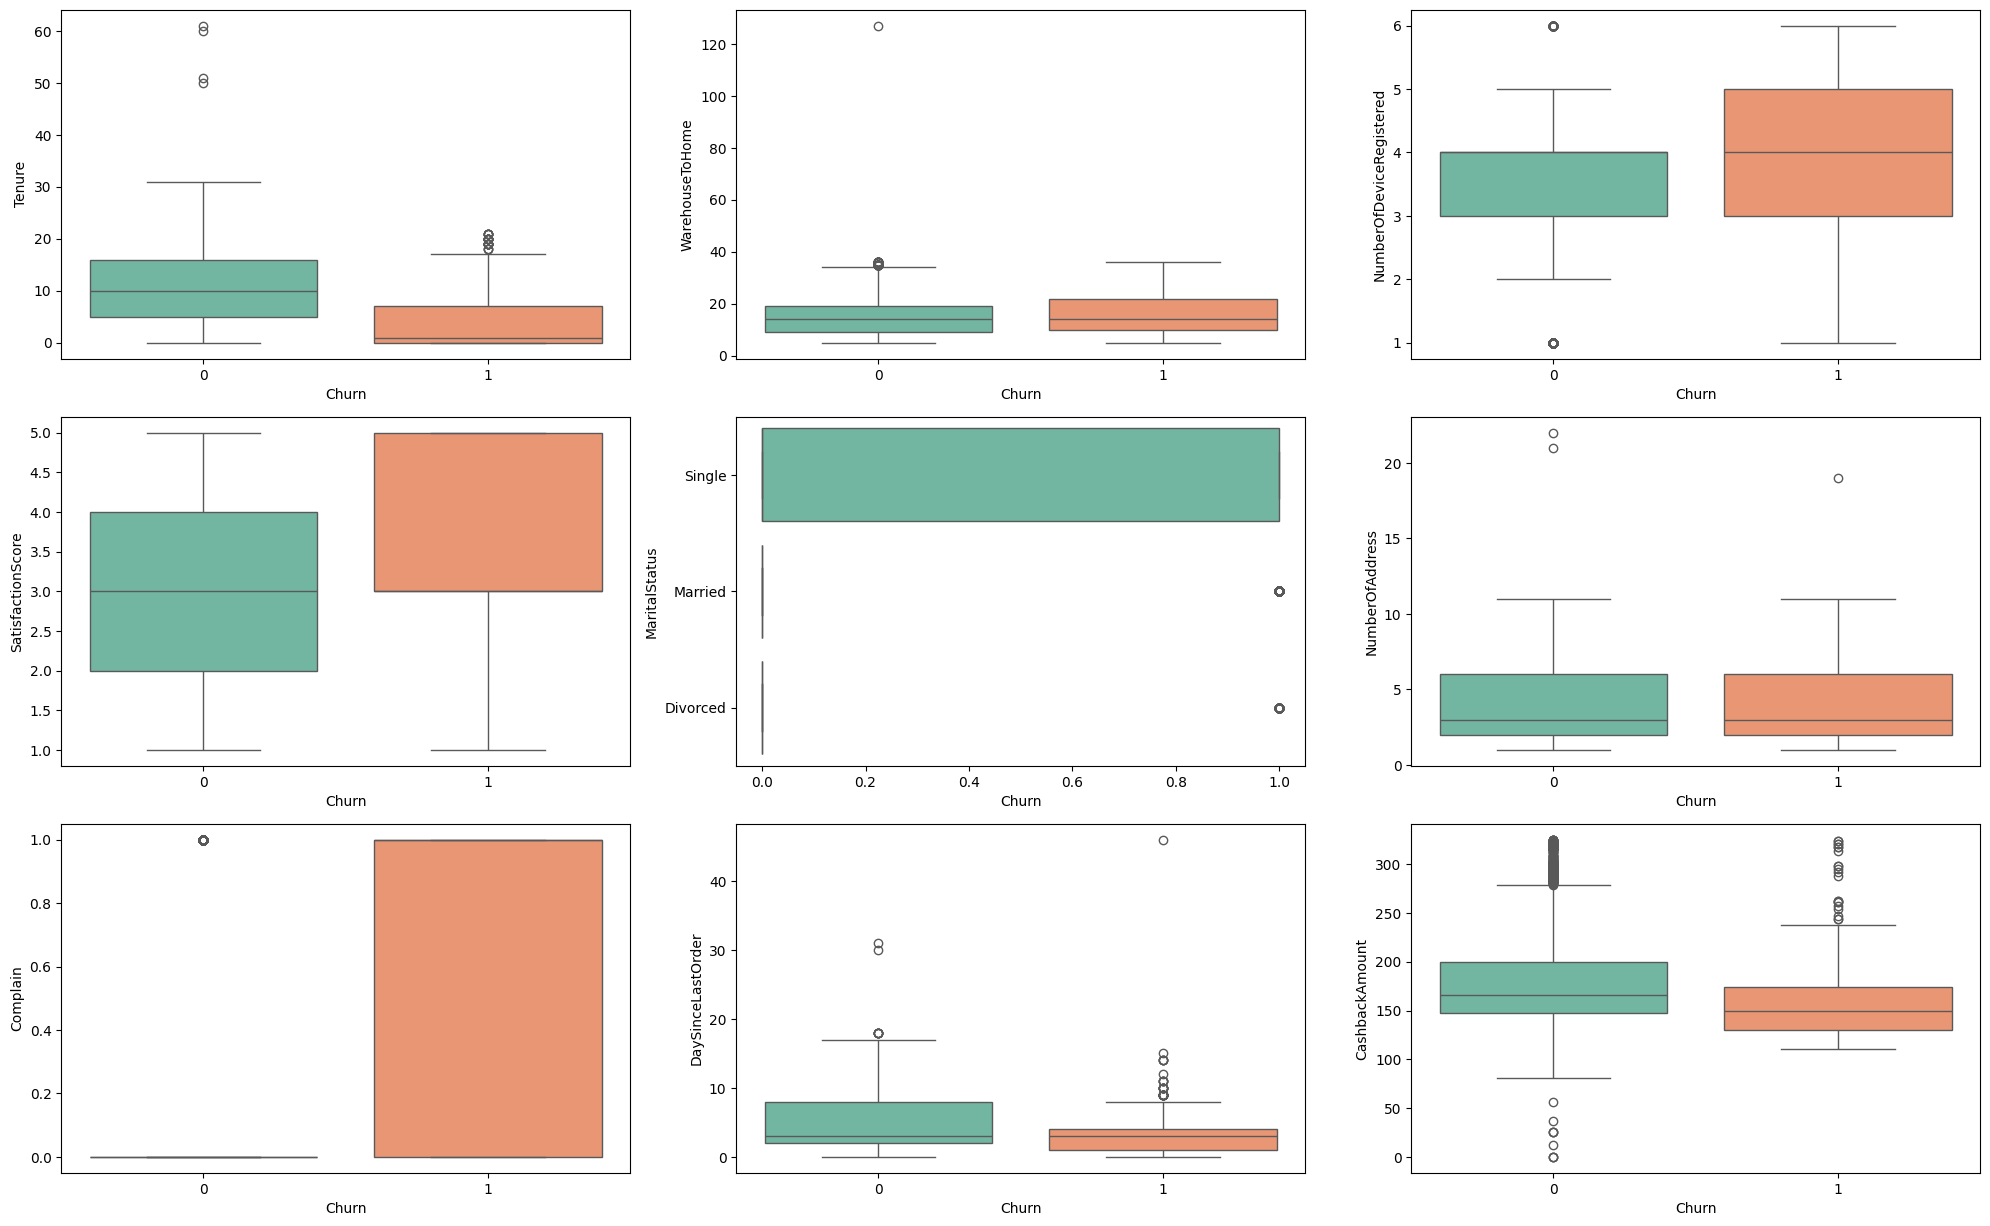

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))

plt.subplot(4, 3, 1)
sns.boxplot(x='Churn', y='Tenure', data=df, palette='Set2')

plt.subplot(4, 3, 2)
sns.boxplot(x='Churn', y='WarehouseToHome', data=df, palette='Set2')

plt.subplot(4, 3, 3)
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df, palette='Set2')

plt.subplot(4, 3, 4)
sns.boxplot(x='Churn', y='SatisfactionScore', data=df, palette='Set2')

plt.subplot(4, 3, 5)
sns.boxplot(x='Churn', y='MaritalStatus', data=df, palette='Set2')

plt.subplot(4, 3, 6)
sns.boxplot(x='Churn', y='NumberOfAddress', data=df, palette='Set2')

plt.subplot(4, 3, 7)
sns.boxplot(x='Churn', y='Complain', data=df, palette='Set2')

plt.subplot(4, 3, 8)
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df, palette='Set2')

plt.subplot(4, 3, 9)
sns.boxplot(x='Churn', y='CashbackAmount', data=df, palette='Set2')

plt.tight_layout()
plt.show()


In [ ]:
Categorical_features = ['PreferedOrderCat', 'MaritalStatus']

In [ ]:
numerical_features = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder','Complain','CashbackAmount','NumberOfAddress','SatisfactionScore','NumberOfDeviceRegistered']

In [ ]:
df_features = df[numerical_features + Categorical_features + ['Churn'] ]
df_features.head(10)

,Tenure,WarehouseToHome,DaySinceLastOrder,Complain,CashbackAmount,NumberOfAddress,SatisfactionScore,NumberOfDeviceRegistered,PreferedOrderCat,MaritalStatus,Churn
0,15.0,29.0,7.0,0,143.32,2,3,4,Laptop & Accessory,Single,0
1,7.0,25.0,7.0,0,129.29,2,1,4,Mobile,Married,0
2,27.0,13.0,7.0,0,168.54,5,1,3,Laptop & Accessory,Married,0
3,20.0,25.0,3.0,0,230.27,7,3,4,Fashion,Divorced,0
4,30.0,15.0,8.0,0,322.17,8,4,4,Others,Single,0
5,7.0,16.0,11.0,0,152.81,2,2,4,Mobile Phone,Divorced,0
6,1.0,15.0,2.0,0,149.51,3,5,6,Mobile Phone,Divorced,0
7,1.0,11.0,1.0,0,154.73,3,5,4,Mobile Phone,Single,1
8,11.0,12.0,4.0,0,137.02,2,3,4,Mobile Phone,Married,0
9,17.0,7.0,2.0,1,157.43,5,1,3,Laptop & Accessory,Married,0


In [ ]:
def train_test_split_and_features(df_features):
    X = df_features.drop('Churn', axis=1)
    y = df_features['Churn']
    X = pd.get_dummies(X, dtype=int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(X.head(5))
    print(X.columns)

    features = list(X.columns)
    return X_train, X_test, y_train, y_test, features



In [ ]:
X_train, X_test, y_train, y_test, features = train_test_split_and_features(df_features)


   Tenure  WarehouseToHome  DaySinceLastOrder  Complain  CashbackAmount  \
0    15.0             29.0                7.0         0          143.32   
1     7.0             25.0                7.0         0          129.29   
2    27.0             13.0                7.0         0          168.54   
3    20.0             25.0                3.0         0          230.27   
4    30.0             15.0                8.0         0          322.17   

   NumberOfAddress  SatisfactionScore  NumberOfDeviceRegistered  \
0                2                  3                         4   
1                2                  1                         4   
2                5                  1                         3   
3                7                  3                         4   
4                8                  4                         4   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                         0                         0   
1                         0     

In [ ]:
X_train.head(10)

,Tenure,WarehouseToHome,DaySinceLastOrder,Complain,CashbackAmount,NumberOfAddress,SatisfactionScore,NumberOfDeviceRegistered,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
3752,3.0,7.0,2.0,0,204.18,3,1,4,1,0,0,0,0,0,0,1,0
1188,13.0,8.0,9.0,0,294.36,1,3,3,0,0,0,0,0,1,0,1,0
3364,9.0,31.0,2.0,1,123.13,5,4,4,0,0,0,1,0,0,0,0,1
1926,27.0,31.0,3.0,0,195.05,5,1,2,1,0,0,0,0,0,0,1,0
3578,27.0,7.0,7.0,0,273.28,7,1,3,0,1,0,0,0,0,0,0,1
3525,25.0,33.0,18.0,0,288.07,4,3,4,0,1,0,0,0,0,0,1,0
1842,7.0,28.0,14.0,0,145.28,3,4,2,0,0,0,0,1,0,0,1,0
1490,13.0,11.0,12.0,1,204.75,6,5,4,1,0,0,0,0,0,0,1,0
1288,25.0,9.0,4.0,1,179.69,3,3,4,1,0,0,0,0,0,0,1,0
1146,21.0,13.0,2.0,0,154.86,5,5,3,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def fit_and_evaluate_model(x_train, x_test, y_train, y_test,
                           max_depth=5,
                           min_samples_split=0.01,
                           max_features=0.8,
                           max_samples=0.8):

    random_forest = RandomForestClassifier(
        random_state=0,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        max_samples=max_samples
    )

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)

    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)

    print("Confusion Matrix:")
    print(random_forest_conf_matrix)
    print("\n")

    print("Accuracy of Random Forest:", random_forest_acc_score * 100, "\n")

    print("Classification Report:")
    print(classification_report(y_test, random_forest_predict))

    return model


In [ ]:
model = fit_and_evaluate_model(X_train, X_test, y_train, y_test)


Confusion Matrix:
[[633  27]
 [ 51  78]]


Accuracy of Random Forest: 90.11406844106465 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       660
           1       0.74      0.60      0.67       129

    accuracy                           0.90       789
   macro avg       0.83      0.78      0.80       789
weighted avg       0.90      0.90      0.90       789



In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'churn_model.pkl')

# Save the feature names too
import json
with open('churn_model_features.json', 'w') as f:
    json.dump(features, f)


In [ ]:
# Step 1: Create new customer dictionary (raw input)
new_customer = {
    'Tenure': 3.0,
    'WarehouseToHome': 5.0,
    'NumberOfDeviceRegistered': 1,
    'PreferedOrderCat': 'Fashion',
    'SatisfactionScore': 4,
    'MaritalStatus': 'Single',
    'NumberOfAddress': 2,
    'Complain': 0,
    'DaySinceLastOrder': 12.0,
    'CashbackAmount': 150.00
}

# Step 2: Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Step 3: One-hot encode
new_customer_df_encoded = pd.get_dummies(new_customer_df)

# Step 4: Align columns to match training features
# (missing columns will be added with 0s)
for col in features:
    if col not in new_customer_df_encoded.columns:
        new_customer_df_encoded[col] = 0

# Step 5: Ensure column order matches
new_customer_df_encoded = new_customer_df_encoded[features]

# Step 6: Predict
prediction = model.predict(new_customer_df_encoded)[0]

if prediction == 1:
    print("⚠️ The customer is likely to CHURN.")
else:
    print("✅ The customer is likely to STAY.")


✅ The customer is likely to STAY.
